In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping

In [21]:
# Load your CSV data
df = pd.read_csv("OASIS4_data_CDR.csv")
df.info()

df = df.drop(['oasis_id', 'cdr_id'], axis=1)
# Remove rows with missing values
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   oasis_id    1158 non-null   object 
 1   cdr_id      1158 non-null   object 
 2   visit_days  1158 non-null   int64  
 3   memory      1127 non-null   float64
 4   orient      1123 non-null   float64
 5   judgement   1124 non-null   float64
 6   community   1126 non-null   float64
 7   homehobb    1126 non-null   float64
 8   perscare    1121 non-null   float64
 9   sumbox      1116 non-null   float64
 10  cdr         1148 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 99.6+ KB


In [8]:
df['cdr'].value_counts()

cdr
0.5    622
1.0    288
0.0    102
2.0     92
3.0      2
Name: count, dtype: int64

In [10]:
df.loc[df['cdr'] <= 0.5, 'cdr'] = 0
df.loc[df['cdr'] > 0.5, 'cdr'] = 1


In [11]:
# Split the data into features (x) and the target (y)
x = df.drop('cdr', axis=1)
y = df['cdr']

In [12]:
# Standardize the input features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# One-hot encode the target variable
y = pd.get_dummies(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [13]:
# Define your model architecture
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))  # Number of classes for classification

# implement early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Create the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Model training
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])

# Model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy * 100:.2f}%')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 850 (3.32 KB)
Trainable params: 850 (3.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
28/28 [==============================] - 2s 13ms/step - loss: 0.6394 - accuracy: 0.5532 - val_loss: 0.5994 - val_accuracy: 0.7027
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7070 - val_loss: 0.5496 - val_accuracy: 0.7973
Ep

In [19]:
# model.save('OASIS4_CDR.h5')

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
x_train.shape[1]

8

#### Loss Curves

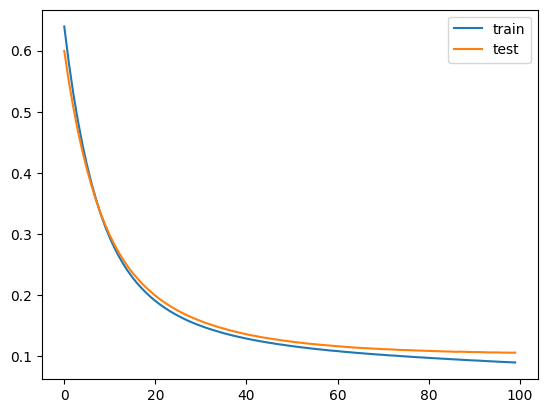

In [15]:
# plot the loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Accuracy Curve

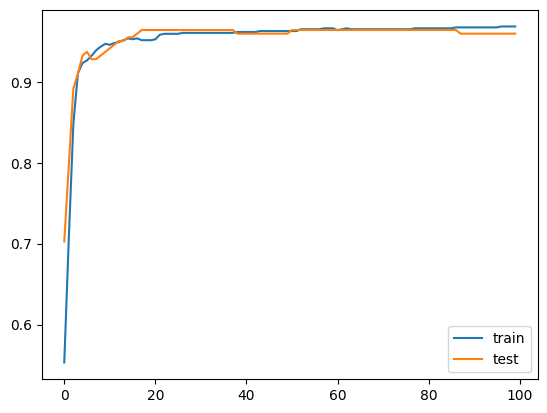

In [16]:
# plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       149
           1       0.93      0.95      0.94        73

    accuracy                           0.96       222
   macro avg       0.95      0.96      0.95       222
weighted avg       0.96      0.96      0.96       222

a = 0.9594594594594594


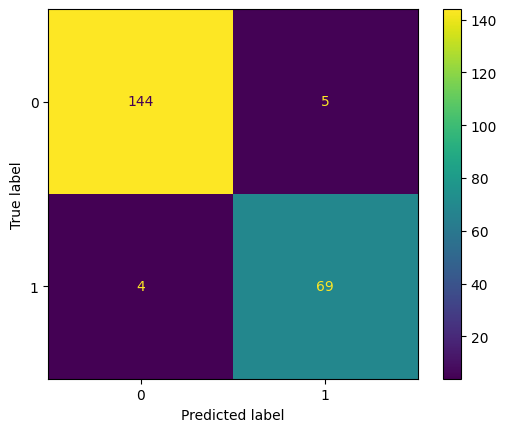

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(np.array(y_test), axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot()
print(f"a = {accuracy_score(y_test, y_pred)}")

#### data_clinical.csv

In [6]:
# # Load your CSV data
# df = pd.read_csv("OASIS4_data_clinical.csv")

# df = df.drop(['oasis_id', 'demographics_id', 'final_dx', 'marriage'], axis=1)
# # Remove rows with missing values
# df = df.dropna()

# for col in df.columns:
#     if df[col].dtype == 'int64':
#         df[col] = df[col].astype(float)

# # sort the correlation values wrt final_dx_categorized (absolute values)
# correlation_matrix = df.corr()

# # Get the absolute values of correlations with respect to 'final_dx_categorized'
# correlation_with_target = correlation_matrix['final_dx_categorized'].abs()

# # Sort the variables by their absolute correlation values
# sorted_correlations = correlation_with_target.sort_values(ascending=False)

# # Display the sorted correlations
# print(sorted_correlations)

# # Split the data into features (x) and the target (y)
# # choose the top 8 features with the highest correlation values. Automate the code to choose the top 8 features.
# # Select the top 8 features with the highest absolute correlation values
# top_features = sorted_correlations.index[1:9]  # Exclude the target variable

# # Split the data into x (selected features) and y (target variable)
# x = df[top_features]
# y = df['final_dx_categorized']

# # Display the top 8 selected features
# print(top_features)

In [7]:
# print(y.value_counts())

In [8]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f'Test loss: {loss:.4f}')
# print(f'Test accuracy: {accuracy * 100:.2f}%')